In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 70% !important;} </style>" 

In [4]:
titanic_data = pd.read_csv('train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
y = titanic_data.Survived

In [9]:
X = pd.get_dummies(X)

In [10]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
X.Age.median()

28.0

In [12]:
X = X.fillna({'Age': X.Age.median()})

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


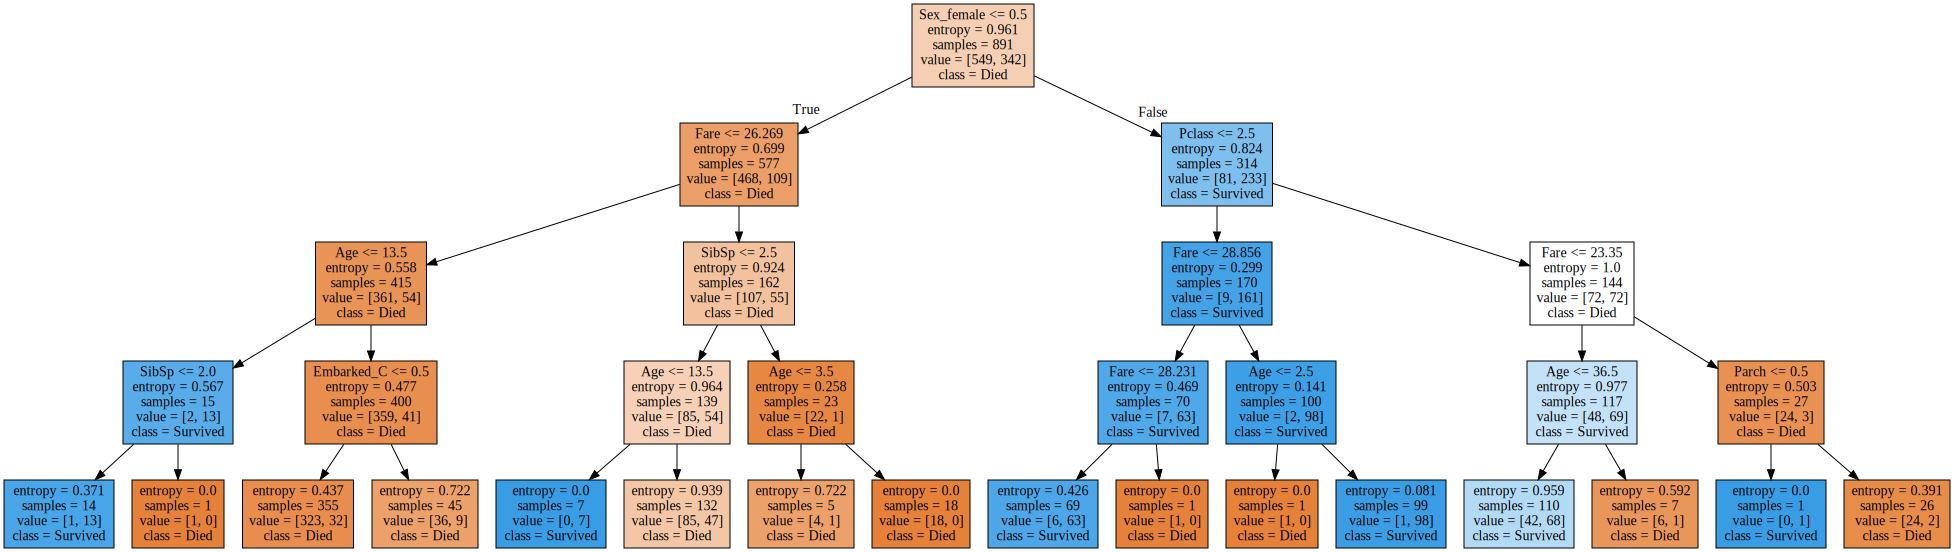

In [16]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [17]:
export = tree.export_graphviz(clf,feature_names=list(X),filled=True)

In [18]:
graph = pydotplus.graph_from_dot_data(export)  
graph.write_pdf("titanic.pdf")
graph.write_png("titanic.png")

True

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
clf.score(X_train, y_train)

0.8338926174496645

In [22]:
clf.score(X_test, y_test)

0.823728813559322

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [25]:
clf.score(X_train, y_train)

0.8406040268456376

In [26]:
clf.score(X_test, y_test)

0.8101694915254237

In [27]:
max_depth_values = range(1, 100)

In [28]:
scores_data = pd.DataFrame()

In [29]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [30]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031


In [31]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [32]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [33]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.808768
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.805392


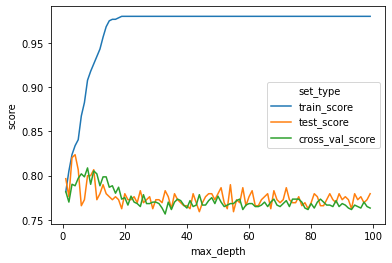

In [34]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [35]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [36]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [37]:
best_clf.score(X_test, y_test)

0.8

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
clf = tree.DecisionTreeClassifier()

In [40]:
clf

DecisionTreeClassifier()

In [41]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}

In [42]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)

In [43]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [44]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [45]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [46]:
best_clf = grid_search_cv_clf.best_estimator_

In [47]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [48]:
best_clf.score(X_test, y_test)

0.7728813559322034

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
y_pred = best_clf.predict(X_test)

In [51]:
precision_score(y_test, y_pred)

0.7789473684210526

In [52]:
recall_score(y_test, y_pred)

0.6166666666666667

In [53]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [54]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

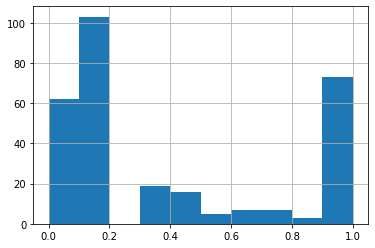

In [55]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [56]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.45, 1, 0)

In [57]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.13265306, 1.        , 0.40740741, 0.        , 0.64285714,
       0.06756757, 0.34615385, 0.75      , 0.16666667, 0.66666667,
       0.8       , 0.54545455, 0.375     , 0.85714286])

In [58]:
precision_score(y_test, y_pred)

0.7789473684210526

In [59]:
recall_score(y_test, y_pred)

0.6166666666666667

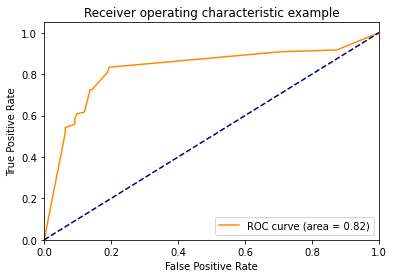

In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [61]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [62]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

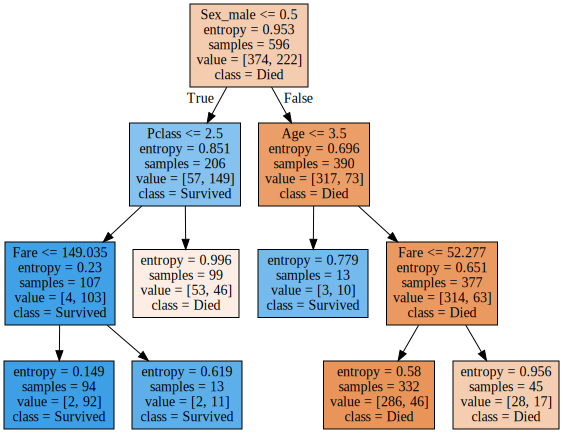

In [63]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf_rf = RandomForestClassifier()

In [66]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [67]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [68]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [69]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [70]:
feature_importances = best_clf.feature_importances_

In [71]:
feature_importances_df = pd.DataFrame({'feature': list(X_train),
                                       'feature_importances': feature_importances})

In [72]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
5,Sex_female,0.370019
1,Age,0.183717
0,Pclass,0.176055
4,Fare,0.171110
2,SibSp,0.058635
9,Embarked_S,0.029884
8,Embarked_Q,0.010580
3,Parch,0.000000
6,Sex_male,0.000000
7,Embarked_C,0.000000


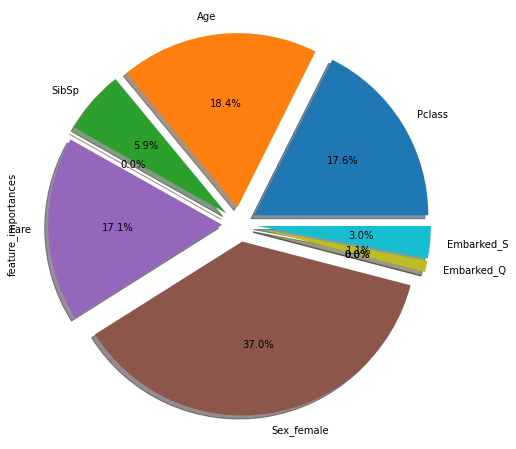

In [73]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.feature,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));